# Аналилиз спроса пассажиров на рейсы авиакомпании

### Задание <a id="step0"></a>   
Вы аналитик российской авиакомпании F9, которая выполняет внутренние пассажирские перевозки. Для развития компании важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

## Оглавление

1. [Задание](#step0)  
2. [Шаг 1. Получение данных с сайта по URL](#step1)  
3. [Шаг 2. Исследовательский анализ данных ](#step2)
4. [Шаг 3. Подготовка данных о количестве рейсов во время фестивалей](#step3)
5. [Шаг 4. Аналитика средствами Python](#step4)  


### Шаг 1. Получение данных с сайта по URL <a id="step1"></a>   
Напишите парсер для сбора с сайта данных о 11 крупнейших фестивалях 2018 года.

Ссылка на сайт: https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html

In [1]:
import pandas as pd
import requests # библиотека для работы с сайтами html
from bs4 import BeautifulSoup # библиотека для парсинга html страниц 


# сохраним в переменной URL ссылку на сайт с требуемыми данными 
URL = 'https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html' 

req = requests.get(URL)                   # запрос ответа сайта с данными по URL используя библиотеку requests
soup = BeautifulSoup(req.text, 'lxml')    # в переменную soup запишем преобразованный для дальнейшей обработке HTML код сайта 

table_head =[] # Создадим пустой список для добавления названия колонок таблицы данных

for i in soup.find('table', id = 'best_festivals').find_all('th'):
    table_head.append(i.text)

table_data = [] # Создадим пустой список для добавления данных выгруженных с сайта

# Циклом выгрузим данные из soup в список table_data
for i in soup.find('table', id = 'best_festivals').find_all('td'): 
    table_data.append(i.text) 
# из одномерного списка создадим двумерный с разбивкой по количеству колонок в таблице на сайте для дальнейшего формирования DF
festivals_data = [table_data[i:i+len(table_head)] for i in range(0, len(table_data), len(table_head))]  

# создадим таблицу DF festivals с информациях о фестивалях собранных с требуемого сайта 
festivals = pd.DataFrame(festivals_data, columns=table_head)
festivals

,Название фестиваля,Место проведения,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018
3,Доброфест,Ярославль,29.07.2018
4,Park Live,Москва,28.07.2018
5,Пикник Афиши,Москва,04.08.2018
6,VK FEST,Санкт-Петербург,29.07.2018
7,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018
8,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018
9,Видфест,Москва,08.09.2018


 ### Шаг 2. Исследовательский анализ данных  <a id="step2"></a>  
 **(Данный шаг выполнен на ресурсе Yandex Practikum, ниже содетжится код запроса к данным SQL сервера )**
 
 
**Задание :**
*    Найдите количество рейсов с вылетом в сентябре 2018 года на каждой модели самолёта. Назовите получившееся поле flights_amount и выведите его, также выведите поле model.
    
*    Посчитайте количество рейсов по всем моделям самолетов Boeing и Airbus в сентябре. Назовите получившуюся переменную flights_amount и выведите ее.  


### Шаг 3. Подготовка данных о количестве рейсов во время фестивалей <a id="step3"></a>  
 **(Данный шаг выполнен на ресурсе Yandex Practikum, ниже содетжится код запроса к данным SQL сервера )**

**Задание :**
*    Установите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведите название фестиваля festival_name и номер недели festival_week.
    
*    Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте количество билетов, купленных на рейсы в Москву (номер недели week_number и количество рейсов flights_amount). Получите таблицу, в которой будет информация о количестве купленных за неделю билетов, отметка, проходил ли в эту неделю фестиваль, название фестиваля festival_name и номер недели week_number.


### Шаг 4. Аналитика средствами Python <a id="step4"></a>  


#### Результаты запросов из предыдущих заданий:

1. Запрос " Найдите количество рейсов с вылетом в сентябре 2018 года на каждой модели самолёта" содержится в файле *query_1.csv*. 

    В нём содержится информация:

    * model — модели самолета,
    * flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года.

2.  Запрос "Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года." содержится в файле *query_2.csv*. 

    В нём содержится информация:

    * city —  города,
    * average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года.
    

**Задание**

Необходимо провести анализ данных полученных в предыдущих шагах:    
*    импортировать файлы;
*    изучить данные в них;
*    проверить типы данных на корректность;
*    выбрать топ-10 городов по количеству рейсов;
*    построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
*    сделать выводы по каждому из графиков, пояснить результат.

In [2]:
# Подключим необходимые библиотеки
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np


# Выгрузим данные из файлов query_1.csv и query_2.csv в таблицы с именами query_1 и query_2 соответственно
query_1 = pd.read_csv('5_project_data\\query_1.csv')
query_2 = pd.read_csv('5_project_data\\query_2.csv')

In [3]:
# Вывдем таблицу query_1 и информацию о данных 

print( '\033[1m' + 'Таблица query_1')
display(query_1)
print('\033[1m' + 'Информация о таблице query_1')
display(query_1.describe())
display(query_1.info())
# Вывдем таблицу query_2 и информацию о данных 
print( '\033[1m' + 'Таблица query_2')
display(query_2)
print('\033[1m' + 'Информация о таблице query_2')
display(query_2.describe())
display(query_2.info())

Таблица query_1


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Информация о таблице query_1


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

Таблица query_2


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


Информация о таблице query_2


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

### Описание данных 
1. query_1: 
    * model — модели самолета
    * flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года
    

2. query_2:
    * city —  города
    * average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года

### Вывод :

Пустых значений нет. Для дальнейшего анализа и визуализации данных необходимо будет округлить значения в таблице query_2 и перевести формат данных к int. 

Выбрать топ-10 городов по количеству рейсов: 

In [4]:
# Для более точного определения ТОП-10 городов не будем приводить формат данных колонки average_flights
# Сохраним ТОП-10 в таблице top_10_city
top_10_city = query_2.sort_values('average_flights', ascending = False).head(10)
top_10_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


In [5]:
# Обрабоаем данные в колонке average_flights таблицы query_2
query_2['average_flights'] = query_2['average_flights'].round().astype('int')

Построить график зависимости модели самолетов и количество рейсов, 

<AxesSubplot:xlabel='model'>

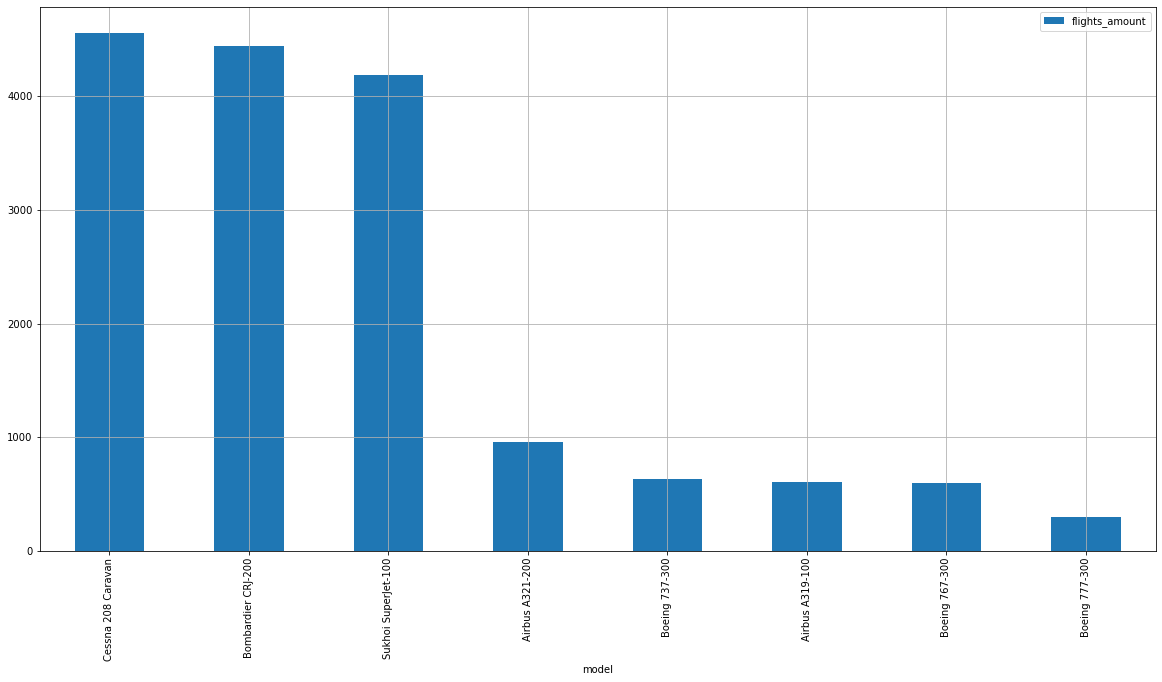

In [6]:
query_1.sort_values('flights_amount', ascending = False).plot(y='flights_amount', x='model', kind='bar', \
                                                              grid=1, figsize = (20,10))

Есть 3 явных лидера по количеству полетов (Cessna, Bombardier, Sukhoi). Остальные модели самолетов имеют примерно одинаковые показатель количества полетов.

Построить график зависимости города и количество рейсов

<AxesSubplot:xlabel='city'>

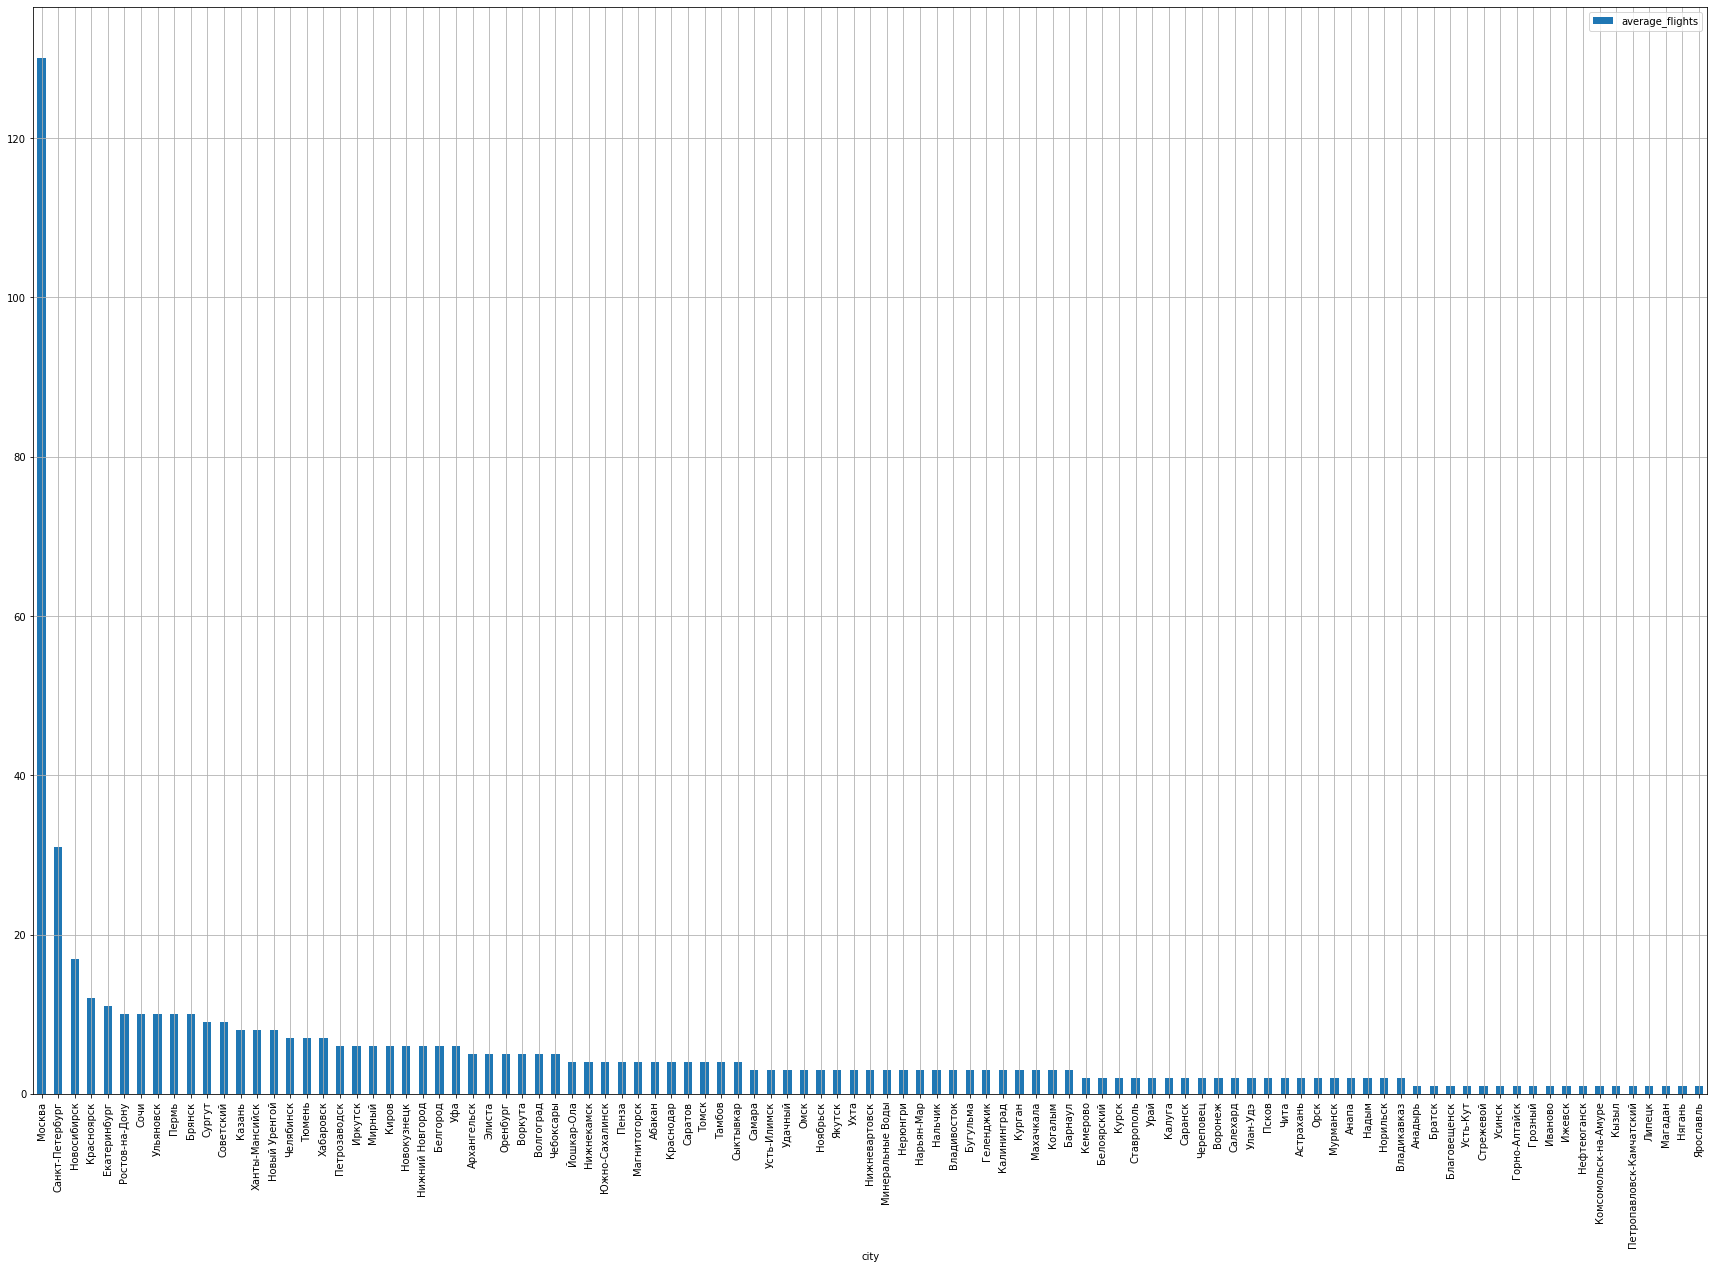

In [7]:
query_2.sort_values('average_flights', ascending = False).plot(y='average_flights', x='city', kind='bar', \
                                                               grid=1, figsize = (30,20))

Построить график зависимости топ-10 городов и количество рейсов;

<AxesSubplot:xlabel='city'>

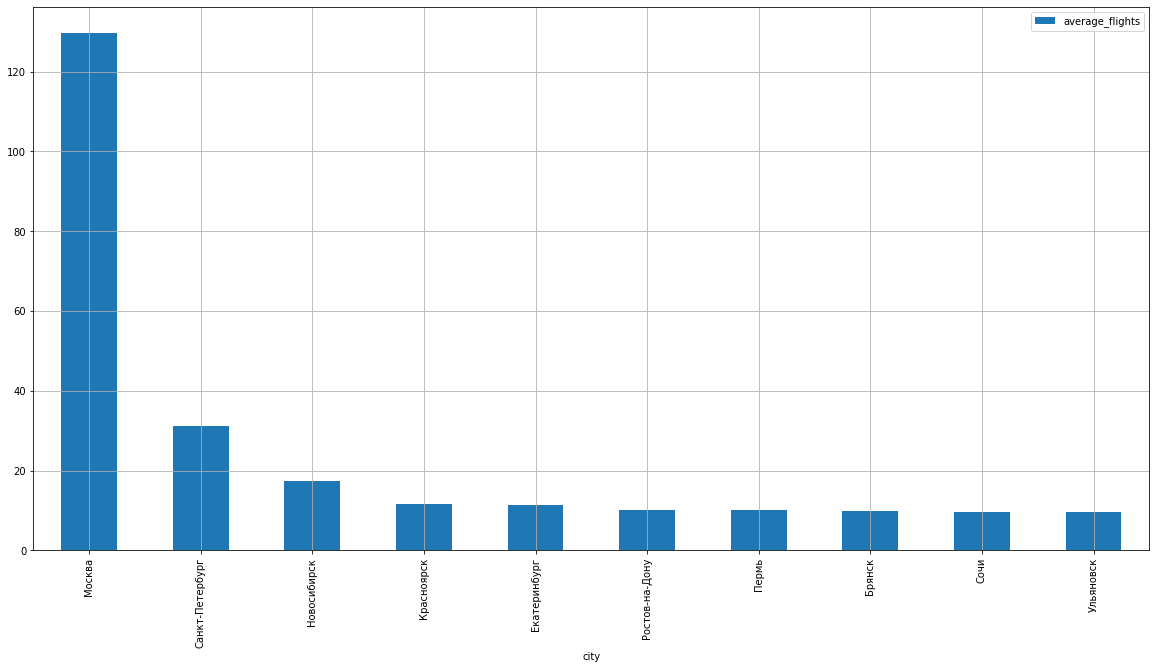

In [8]:
top_10_city.plot(y='average_flights', x='city', kind='bar', grid=1, figsize = (20,10))

Значительно опережает остальные города Москва со 130 рейсами в день. На втором месте находится Санкт-Петербург. Остальные города принимают примерно одинаковое количество рейсов день.

### Вывод

При анализе и визуализации данных, пришлось округлить данные в "average_flights". Cessna, Bombardier и Sukhoi лидируют по количеству рейсов. Москва является лидером по авиоперелетам, а Санкт-Петербург занимает второе место.